In [ ]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize

import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()

# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
  process = psutil.Process(os.getpid())
  print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
  print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))

printm()

  Created wheel for gputil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7411 sha256=8ea258cf3448e4b997b9cae6fa150f47807c4dd24e25329dde640f29d04407e7
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil


IndexError: ignored

In [ ]:
# Dependencies
!pip install pyamg

     |████████████████████████████████| 6.4MB 6.1MB/s 
     |████████████████████████████████| 194kB 59.5MB/s 


### Data

In [ ]:
from pathlib import Path
import shutil
from sklearn.model_selection import train_test_split

In [ ]:
from pathlib import Path

def split_data(data_dir, test_dir, test_size, random_state=42):
    data_path = Path(data_dir)
    file_paths = sorted([f for f in data_path.iterdir() if f.is_file()])
    
    data_path = Path(data_dir)
    test_data_path = Path(test_dir)
    test_data_path = test_data_path.joinpath(data_path.relative_to(test_data_path.parent))
    test_data_path.mkdir(parents=True, exist_ok=True)

    if type(test_size) == int:
        test_size = test_size / len(file_paths)

    train_paths, test_paths = train_test_split(file_paths, test_size=test_size, random_state=random_state)  

    for image_path in test_paths:
        image_path.rename(test_data_path.joinpath(image_path.name))

In [ ]:
def copy_same_data(root, like_root, dest_dir, nested=True, move=False):
    data_path = Path(root)
    like_path = Path(like_root)
    dest_path = Path(dest_dir)
    dest_path.mkdir(parents=True, exist_ok=True)
    like_files = [x for x in like_path.glob('**/*') if x.is_file()]

    for file in like_files:
        file_name = file.name

        if nested:
            file_folder = str((int(file_name.split('.')[0])//1000)*1000)
            file_data_path = data_path.joinpath(f'{file_folder.zfill(5)}/{file_name}')
        else:
            file_data_path = data_path.joinpath(file_name)

        if move:
            file_data_path.rename(dest_path.joinpath(file_name))
        else:
            shutil.copy(file_data_path, dest_path.joinpath(file_name))

<hr>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!mkdir -p /content/data/celeba
!mkdir -p /content/data/ffhq
!mkdir -p /content/data/test_data
!mkdir -p /content/data/qd_masks
!mkdir -p /content/data/ffhq_HQ

In [ ]:
!cp "/content/drive/My Drive/Projects/iis-project/data/img_align_celeba.zip" /content/data/celeba
!cp "/content/drive/My Drive/Projects/iis-project/data/ffhq128x128.zip" /content/data/ffhq
!cp "/content/drive/My Drive/Projects/iis-project/data/qd_imd.tar.gz" /content/data/qd_masks
!cp "/content/drive/My Drive/Projects/iis-project/data/output/stylegan_rr_output.zip" /content/data/test_data

In [ ]:
!unzip -qq /content/data/celeba/img_align_celeba.zip -d /content/data/celeba
!unzip -qq /content/data/ffhq/ffhq128x128.zip -d /content/data/ffhq
!tar -xzf /content/data/qd_masks/qd_imd.tar.gz -C /content/data/qd_masks
!unzip -qq /content/data/test_data/stylegan_rr_output.zip -d /content/data/test_data

In [ ]:
celeba_dir = '/content/data/celeba/img_align_celeba'
ffhq_dir = '/content/data/ffhq/thumbnails128x128'
ffhq_HQ_dir = '/content/data/test_data/ffhq_HQ'
ffhq_root = '/content/drive/My Drive/Projects/iis-project/data/images1024x1024'
test_dir = '/content/data/test_data'

In [ ]:
# split_data(data_dir=ffhq_dir, test_dir=test_dir, test_size=100)

In [ ]:
copy_same_data(root=ffhq_dir, like_root='/content/data/test_data/stylegan_rr_output/ground_truth', dest_dir='/content/data/test_data/ffhq/thumbnails128x128', nested=False, move=True)

In [ ]:
copy_same_data(root=ffhq_root, like_root='/content/data/test_data/ffhq/thumbnails128x128', dest_dir='/content/data/test_data/ffhq_HQ')

In [ ]:
## Remove data folders
# !rm -r /content/data/celeba/img_align_celeba
# !rm -r /content/data/ffhq/
# !rm -r /content/data/test_data

### Code repository

In [1]:
%cd /content
!git clone "https://github.com/filipovskid/image-inpainting.git"

/content
Cloning into 'image-inpainting'...
remote: Enumerating objects: 281, done.
remote: Counting objects: 100% (281/281), done.
remote: Compressing objects: 100% (199/199), done.
remote: Total 281 (delta 175), reused 179 (delta 78), pack-reused 0
Receiving objects: 100% (281/281), 642.37 KiB | 17.84 MiB/s, done.
Resolving deltas: 100% (175/175), done.


In [ ]:
%cd /content/image-inpainting/
!git pull origin master # inpaint_overview-0
%cd src/
%load_ext autoreload
%autoreload 2

/content/image-inpainting
From https://github.com/filipovskid/image-inpainting
 * branch            master     -> FETCH_HEAD
Already up to date.
/content/image-inpainting/src


In [ ]:
!git checkout evaluation

Branch 'evaluation' set up to track remote branch 'evaluation' from 'origin'.
Switched to a new branch 'evaluation'


In [ ]:
!git pull origin evaluation

remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 10 (delta 8), reused 6 (delta 4), pack-reused 0
Unpacking objects: 100% (10/10), done.
From https://github.com/filipovskid/image-inpainting
 * branch            evaluation -> FETCH_HEAD
   aadcac9..7986bfe  evaluation -> origin/evaluation
Updating aadcac9..7986bfe
Fast-forward
 src/scripts/metrics.py | 13 ++++++++++++-
 1 file changed, 12 insertions(+), 1 deletion(-)


In [ ]:
!git checkout -- .

### DCGAN training

In [ ]:
import DCGAN
from DCGAN import DCGAN_trainer
from DCGAN.DCGAN_trainer import DCGANTrainer

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import torch
import torchvision.utils as vutils

from IPython.display import HTML

print('PyTorch version:', torch.__version__)

PyTorch version: 1.7.0+cu101


In [ ]:
import importlib
importlib.reload(DCGAN_trainer)

<module 'DCGAN.DCGAN_trainer' from '/content/image-inpainting/src/DCGAN/DCGAN_trainer.py'>

In [ ]:
DCGAN.DCGAN_config._C.dimD

64

In [ ]:
def train_model(num_epochs, checkpoint=None):
    # data_root = '/content/data/celeba'
    data_root = '/content/data/ffhq'
    # checkpoints_root = '/content/drive/My Drive/Projects/iis-project/checkpoints_celeba'
    checkpoints_root = '/content/drive/My Drive/Projects/iis-project/checkpoints_ffhq_128'

    dcgan_trainer = DCGANTrainer()
    if checkpoint:
        dcgan_trainer.load_checkpoint(checkpoint)

    g_losses, d_losses, img_list = dcgan_trainer.train(data_root, checkpoints_root, save_epoch=10, num_epochs=num_epochs)

    return g_losses, d_losses, img_list

In [ ]:
def checkpoint_images(last_checkpoint):
    device = torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")
    fixed_noise = torch.randn(64, 100, 1, 1, device=device)
    img_list = []

    for i in range(10, last_checkpoint+1, 10):
        dcgan = DCGANTrainer()
        dcgan.load_checkpoint(f'/content/drive/My Drive/Projects/iis-project/checkpoints_ffhq/checkpoint_{i}.tar')
        netG = dcgan.getNetG()
        with torch.no_grad():
            fake = netG(fixed_noise).detach().cpu()
            img_list.append(vutils.make_grid(fake, padding=2, normalize=True))
    
    return img_list

<hr>

In [ ]:
g_losses, d_losses, img_list = train_model(num_epochs=20)# , checkpoint='/content/drive/My Drive/Projects/iis-project/checkpoints_ffhq/checkpoint_100.tar')

In [ ]:
# 1 - 50
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(g_losses,label="G")
plt.plot(d_losses,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

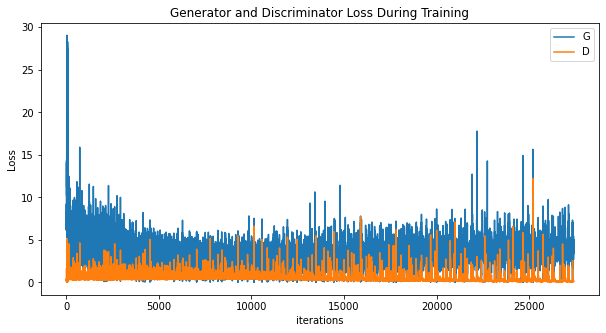

In [ ]:
# 51 - 100
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(g_losses,label="G")
plt.plot(d_losses,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
# 101 - 200
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(g_losses,label="G")
plt.plot(d_losses,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
img_list = checkpoint_images(200)

Config:
{'GDPP': False,
 'attribKeysOrder': None,
 'baseLearningRate': 0.0002,
 'beta1': 0.5,
 'depth': 3,
 'dimD': 64,
 'dimG': 64,
 'dimLatentVector': 100,
 'dimOutput': 3,
 'epsilonD': 0.0,
 'imageSize': 64,
 'lambdaGP': 0.0,
 'lossMode': 'DCGAN',
 'miniBatchSize': 256,
 'nEpoch': 10,
 'sigmaNoise': 0.0,
 'weightConditionD': 0.0,
 'weightConditionG': 0.0}
[+] Checkpoint loaded! Epoch 10.
Config:
{'GDPP': False,
 'attribKeysOrder': None,
 'baseLearningRate': 0.0002,
 'beta1': 0.5,
 'depth': 3,
 'dimD': 64,
 'dimG': 64,
 'dimLatentVector': 100,
 'dimOutput': 3,
 'epsilonD': 0.0,
 'imageSize': 64,
 'lambdaGP': 0.0,
 'lossMode': 'DCGAN',
 'miniBatchSize': 256,
 'nEpoch': 10,
 'sigmaNoise': 0.0,
 'weightConditionD': 0.0,
 'weightConditionG': 0.0}
[+] Checkpoint loaded! Epoch 20.
Config:
{'GDPP': False,
 'attribKeysOrder': None,
 'baseLearningRate': 0.0002,
 'beta1': 0.5,
 'depth': 3,
 'dimD': 64,
 'dimG': 64,
 'dimLatentVector': 100,
 'dimOutput': 3,
 'epsilonD': 0.0,
 'imageSize': 64,
 

In [ ]:
matplotlib.rcParams['animation.embed_limit'] = 2**128

fig = plt.figure(figsize=(8,8))
plt.axis("off")
ims = [[plt.imshow(np.transpose(i,(1,2,0)), animated=True)] for i in img_list]

ani = animation.ArtistAnimation(fig, ims, interval=1000, repeat_delay=1000, blit=True)

HTML(ani.to_jshtml())

Output hidden; open in https://colab.research.google.com to view.

## StyleGAN training on celebA 

In [ ]:
from PIL import Image

In [ ]:
!rm -r /content/data/celeba_lmdb
!mkdir /content/data/celeba_lmdb

In [ ]:
image_path = '/content/data/celeba/img_align_celeba/033227.jpg'

In [ ]:
Image.open(image_path).size

(178, 218)

In [ ]:
%cd /content
!git clone https://github.com/rosinality/style-based-gan-pytorch.git

/content
Cloning into 'style-based-gan-pytorch'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 192 (delta 0), reused 2 (delta 0), pack-reused 189
Receiving objects: 100% (192/192), 34.80 MiB | 48.16 MiB/s, done.
Resolving deltas: 100% (94/94), done.


In [ ]:
!sudo apt install caffe-cuda

In [ ]:
!python /content/style-based-gan-pytorch/prepare_data.py --out /content/data/celeba_lmdb --n_worker 8 /content/data/celeba

files: 202599
90813it [1:42:43, 15.01it/s]Traceback (most recent call last):
  File "/content/style-based-gan-pytorch/prepare_data.py", line 72, in <module>
    prepare(txn, imgset, args.n_worker)
  File "/content/style-based-gan-pytorch/prepare_data.py", line 53, in prepare
    transaction.put(key, img)
lmdb.Error: mdb_put: Input/output error
90813it [1:42:51, 14.71it/s]


In [ ]:
!python /content/style-based-gan-pytorch/train.py --mixing /content/data/celeba_lmdb

/content/style-based-gan-pytorch/train.py:30: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  par1[k].data.mul_(decay).add_(1 - decay, par2[k].data)
Traceback (most recent call last):
  File "/content/style-based-gan-pytorch/train.py", line 330, in <module>
    dataset = MultiResolutionDataset(args.path, transform)
  File "/content/style-based-gan-pytorch/dataset.py", line 23, in __init__
    self.length = int(txn.get('length'.encode('utf-8')).decode('utf-8'))
AttributeError: 'NoneType' object has no attribute 'decode'


In [ ]:
!ls /content/data/celeba/img_align_celeba

In [ ]:
import lmdb

## Image inpainting - Testing ground

In [ ]:
from models.DCGAN_trainer import DCGANTrainer
from mask_generator import MaskGenerator
from inpaint_model import InpaintModel
import torchvision.utils as vutils
from datasets.datasets import create_transform
from torchvision import transforms
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

In [ ]:
def apply_mask(img, mask):
    new_img = np.copy(img)
    new_img[mask == 0] = 1
    
    return new_img

In [ ]:
def prepare_input(image_path, image_size):
    transform = transforms.Compose([
          transforms.Resize(image_size),
          transforms.CenterCrop(image_size)])
  
    image = Image.open(image_path)
    image.show()
    image = transform(image)
    image = np.asarray(image)

    mask = MaskGenerator.random_rectangle(image).astype(dtype=np.uint8)
    masked_image = apply_mask(image, mask)
    
    plt.imshow(masked_image)

    pil_image = Image.fromarray(masked_image)
    # pil_mask = Image.fromarray(mask)
    
    return pil_image, mask # pil_image, pil_mask

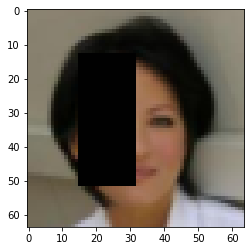

In [ ]:
image, mask = prepare_input('/content/train_data/000101.jpg', 64)

In [ ]:
dcgan = DCGANTrainer()
dcgan.load_checkpoint('/content/drive/My Drive/Projects/iis-project/checkpoints/checkpoint_40.tar')
inpainter = InpaintModel(model=dcgan)

[+] Checkpoint loaded! Epoch 40.


In [ ]:
result = inpainter.inpaint(image, mask) # result, W = inpainter.inpaint(image, mask)

In [ ]:
rs = vutils.make_grid(result, padding=2, normalize=True)

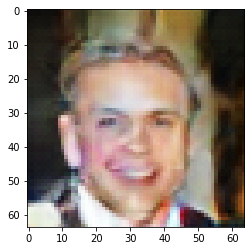

In [ ]:
plt.imshow(np.transpose(rs.detach().cpu(), (1, 2, 0)))

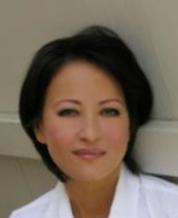

In [ ]:
Image.open('/content/train_data/000101.jpg')

In [ ]:
plt.imshow(np.transpose(W.cpu(), (1,2,0))[:,:,0])

NameError: ignored

In [ ]:
from scipy.signal import convolve2d

device = torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")
def create_importance_weights( mask, w_size=7):
        mask_2d = mask[0, :, :]
        kernel = np.ones((w_size, w_size), dtype=np.float32)
        kernel = kernel / np.sum(kernel)

        importance_weights = mask_2d*convolve2d(1-mask_2d, kernel, mode='same')  # , boundary='symm')
        # importance_weights[mask_2d == 1] = 0

        return torch.from_numpy(np.repeat(importance_weights[np.newaxis, :, :], 3, axis=0)).to(device)

def preprocess(masked_image, image_mask):
    resize_transform = transforms.Compose([
        transforms.Resize(64),
        transforms.CenterCrop(64),
        transforms.ToTensor(),
        # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    image = resize_transform(masked_image).to(device)
    mask = resize_transform(image_mask).to(device)

    return image, mask

In [ ]:
image, mask = preprocess(image, mask)
W = create_importance_weights(mask.cpu().numpy())

TypeError: ignored

In [ ]:
# plt.imshow(np.transpose(W.cpu().numpy(), (1,2,0))[:, :, 2])
plt.imshow(np.transpose(W.cpu().numpy(), (1,2,0))[:, :, 2])
plt.colorbar()

NameError: ignored

## StyleGAN playground

In [ ]:
import importlib
import styleGAN
import inpaint_model
importlib.reload(styleGAN)
importlib.reload(inpaint_model)

<module 'inpaint_model' from '/content/image-inpainting/src/inpaint_model.py'>

#### StyleGAN inpainting

In [ ]:
!mkdir /content/data/
!cp "/content/drive/My Drive/Projects/iis-project/data/ffhq-20358.png" /content/data/

mkdir: cannot create directory ‘/content/data/’: File exists


In [ ]:
stylegan_checkpoint = '/content/drive/My Drive/Projects/iis-project/checkpoints/stylegan/stylegan-256px-new.model'
inpainter = InpaintModel(model_filename=stylegan_checkpoint, config=_styleganConfig, gan_type='stylegan')

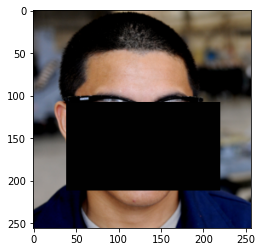

In [ ]:
image, mask = prepare_input('/content/data/ffhq/ffhq-20358.png', image_size=256)

/content/image-inpainting/src/utils/helpers.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  bmask = torch.tensor(mask)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


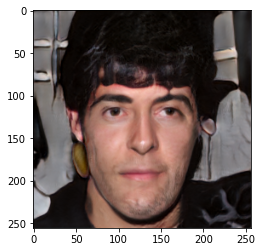

In [ ]:
importance_weight, G_z, inpainted_image = inpainter.inpaint(masked_image=image, image_mask=Image.fromarray(mask))

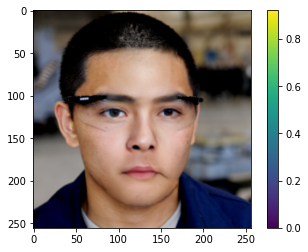

In [ ]:
plt.imshow(inpainted_image)
plt.colorbar()

In [ ]:
G_z.shape

(4, 4, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


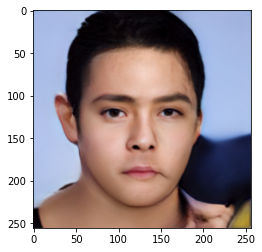

In [ ]:
plt.imshow(G_z)

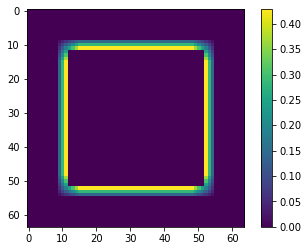

In [ ]:
plt.imshow(importance_weight[:, :, 0])
plt.colorbar()

In [ ]:
importance_weight.shape

(256, 256, 3)

### StyleGAN playground

In [ ]:
from styleGAN.model import load_model as load_stylegan
from styleGAN.model import get_mean_style
from utils.helpers import NormalizeInverse
import torchvision.utils as vutils
import torch
import math
import matplotlib.pyplot as plt

In [ ]:
stylegan_checkpoint = '/content/drive/My Drive/Projects/iis-project/checkpoints/stylegan/stylegan-256px-new.model'

In [ ]:
G, D = load_stylegan(stylegan_checkpoint, device='cuda:0')

In [ ]:
mean_style = get_mean_style(G, 'cuda:0')
step = int(math.log(256, 2)) - 2

In [ ]:
z = torch.randn((5, 512), device='cuda:0')

In [ ]:
o = G(z, step=step, alpha=1, mean_style=mean_style, style_weight=0.7,)

In [ ]:
inverse_normalization = NormalizeInverse((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
inv_o = inverse_normalization(o.squeeze(dim=0))

In [ ]:
plt.imshow(inv_o)

In [ ]:
inv_o.size()

torch.Size([5, 256, 256, 3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


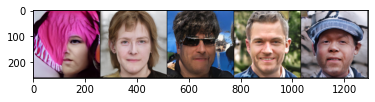

In [ ]:
plt.imshow(vutils.make_grid(inv_o, nrow=5).permute(1, 2, 0).cpu().detach().numpy())

## Image inpainting

In [ ]:
from inpaint_model import InpaintModel
from DCGAN.DCGAN_config import _C as _dcganConfig
from styleGAN.styleGAN_config import _C as _styleganConfig

from mask_generator import MaskGenerator

import torch
import torchvision
from torchvision import transforms

import numpy as np
from PIL import Image
from matplotlib import cm
import matplotlib.pyplot as plt

In [ ]:
def prepare_input(image_path, image_size, mask_type='crct', percent=0.8):
  
  def apply_mask(img, mask):
    new_img = np.copy(img)
    new_img[mask == 0] = 1
    return new_img

  transform = transforms.Compose([
          transforms.Resize(image_size),
          transforms.CenterCrop(image_size)
        ])
  
  image = Image.open(image_path)
  image = transform(image)
  image = np.asarray(image)

  if mask_type == 'noise':
    mask_generator = lambda image: MaskGenerator.random_noise(image, percent)
  else:
    mask_generator = lambda image: MaskGenerator.centered_rectangle(image)

  # mask = MaskGenerator.centered_rectangle(image).astype(dtype=np.uint8)
  mask = mask_generator(image).astype(dtype=np.uint8)
  masked_image = apply_mask(image, mask)
    
  plt.imshow(masked_image)

  pil_image = Image.fromarray(masked_image)
  # pil_mask = Image.fromarray(mask)
  original_image = Image.fromarray(image)
    
  return original_image, pil_image, mask # pil_image, pil_mas

In [ ]:
def show_inpainting(*images, nrow=4):
  # masked_image, importance_weight, G_z, inpainted_image
  # Colormap for importance weight cm.viridis from matplotlib

  to_tensor_image = lambda x: torch.from_numpy(x).permute(2, 0, 1)

  image_batch = torch.stack(tuple(map(to_tensor_image, images)), dim=0)
  grid_img = torchvision.utils.make_grid(image_batch, nrow=nrow)
  fig=plt.figure(figsize=(13, 13))
  plt.imshow(grid_img.permute(1, 2, 0), extent = [0, 1000, 0, 250], aspect=1.25)

#### DCGAN

In [ ]:
input_image_path = '/content/train_data/000101.jpg'
dcgan_checkpoint = '/content/drive/My Drive/Projects/iis-project/checkpoints/checkpoint_40.tar'

In [ ]:
inpainter = InpaintModel(model_filename=dcgan_checkpoint, config=_dcganConfig, gan_type='dcgan')

[+] DCGAN model loaded! Epoch 40.


<hr>

In [ ]:
original, image, mask = prepare_input(input_image_path, image_size=64)

TypeError: ignored

/content/image-inpainting/src/utils/helpers.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  bmask = torch.tensor(mask)


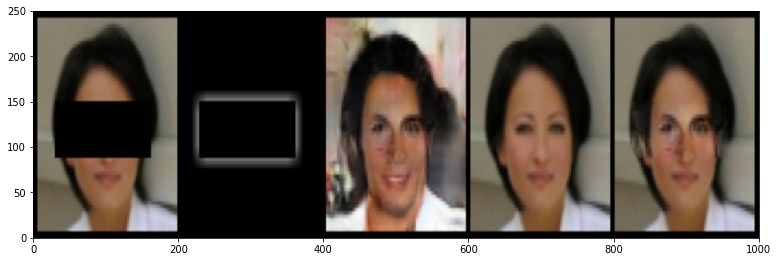

In [ ]:
importance_weight, G_z, inpainted_image = inpainter.inpaint(masked_image=image, image_mask=Image.fromarray(mask))
show_inpainting(np.array(image)/255, importance_weight, G_z, np.array(original)/255, inpainted_image, nrow=5)

**Noise**

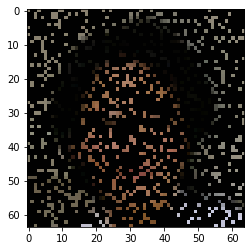

In [ ]:
original, image, mask = prepare_input(input_image_path, image_size=64, mask_type='noise')

/content/image-inpainting/src/utils/helpers.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  bmask = torch.tensor(mask)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


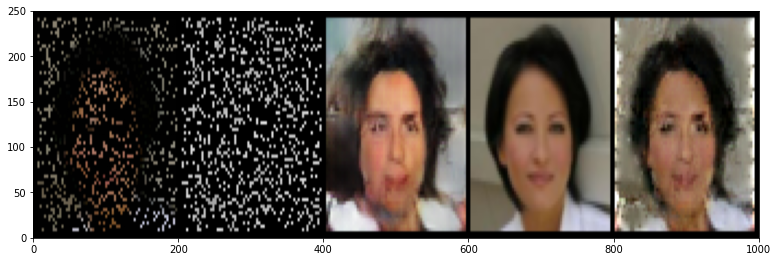

In [ ]:
importance_weight, G_z, inpainted_image = inpainter.inpaint(masked_image=image, image_mask=Image.fromarray(mask))
show_inpainting(np.array(image)/255, importance_weight, G_z, np.array(original)/255, inpainted_image, nrow=5)

#### StyleGAN

In [ ]:
input_image_path = '/content/data/ffhq/ffhq-20358.png'
stylegan_checkpoint = '/content/drive/My Drive/Projects/iis-project/checkpoints/stylegan/stylegan-256px-new.model'

In [ ]:
inpainter = InpaintModel(model_filename=stylegan_checkpoint, config=_styleganConfig, gan_type='stylegan')

<hr>

In [ ]:
original = Image.open('/content/data/ffhq/ffhq-20358.png')

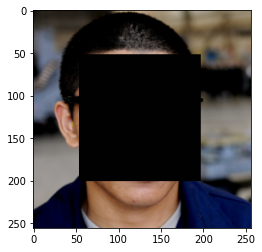

In [ ]:
original, image, mask = prepare_input('/content/data/ffhq/ffhq-20358.png', image_size=256)

/content/image-inpainting/src/utils/helpers.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  bmask = torch.tensor(mask)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


CPU times: user 3min 29s, sys: 1min 57s, total: 5min 26s
Wall time: 5min 27s


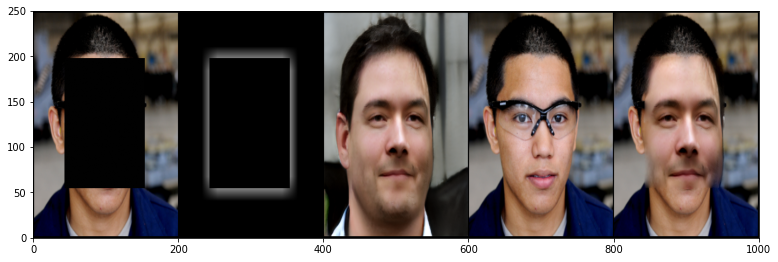

In [ ]:
%%time
importance_weight, G_z, inpainted_image = inpainter.inpaint(masked_image=image, image_mask=Image.fromarray(mask))
show_inpainting(np.array(image)/255, importance_weight, G_z, np.array(original)/255, inpainted_image, nrow=5)

**Noise**

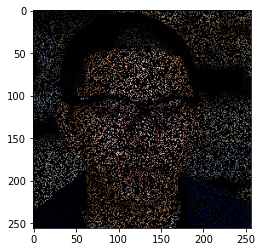

In [ ]:
original, image, mask = prepare_input('/content/data/ffhq/ffhq-20358.png', image_size=256, mask_type='noise')

/content/image-inpainting/src/utils/helpers.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  bmask = torch.tensor(mask)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


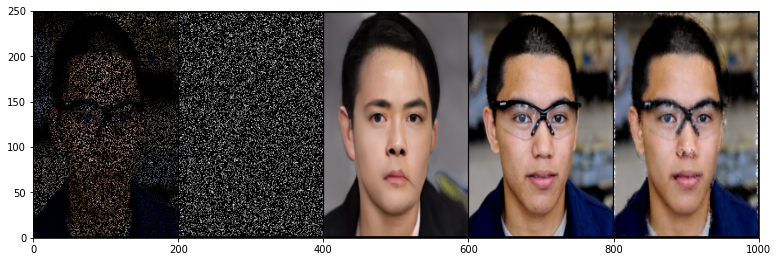

In [ ]:
importance_weight, G_z, inpainted_image = inpainter.inpaint(masked_image=image, image_mask=Image.fromarray(mask))
show_inpainting(np.array(image)/255, importance_weight, G_z, np.array(original)/255, inpainted_image, nrow=5)

<hr>

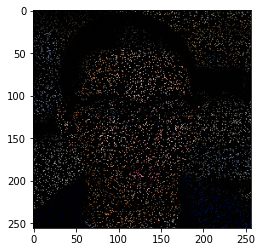

In [ ]:
original, image, mask = prepare_input('/content/data/ffhq/ffhq-20358.png', image_size=256, mask_type='noise', percent=.9)

/content/image-inpainting/src/utils/helpers.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  bmask = torch.tensor(mask)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


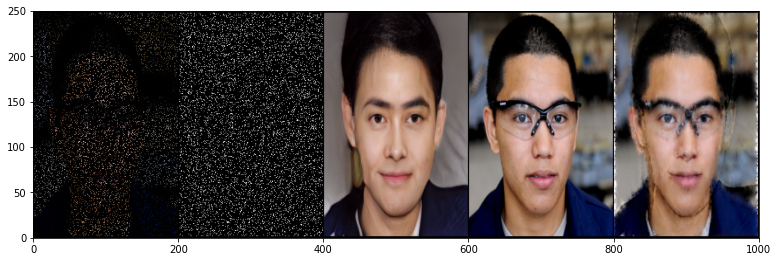

In [ ]:
importance_weight, G_z, inpainted_image = inpainter.inpaint(masked_image=image, image_mask=Image.fromarray(mask))
show_inpainting(np.array(image)/255, importance_weight, G_z, np.array(original)/255, inpainted_image, nrow=5)

<hr>

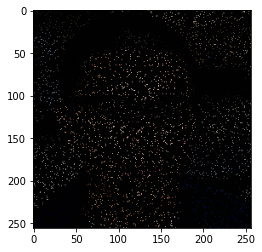

In [ ]:
original, image, mask = prepare_input('/content/data/ffhq/ffhq-20358.png', image_size=256, mask_type='noise', percent=.95)

/content/image-inpainting/src/utils/helpers.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  bmask = torch.tensor(mask)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


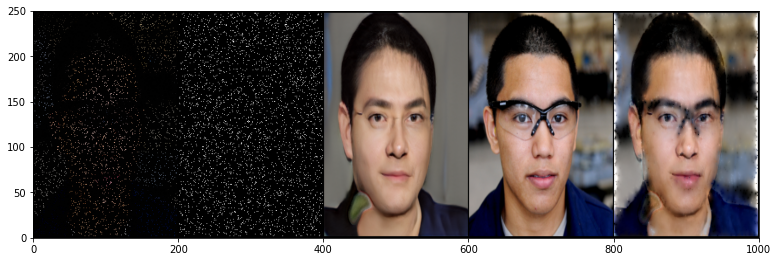

In [ ]:
importance_weight, G_z, inpainted_image = inpainter.inpaint(masked_image=image, image_mask=Image.fromarray(mask))
show_inpainting(np.array(image)/255, importance_weight, G_z, np.array(original)/255, inpainted_image, nrow=5)

## Batch inpainting

In [ ]:
from inpaint_model import InpaintModel
from DCGAN.DCGAN_config import _C as _dcganConfig
from styleGAN.styleGAN_config import _C as _styleganConfig
from datasets.datasets import InpaintDataset

from mask_generator import MaskGenerator

import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
import torchvision.utils as vutils

import numpy as np
from PIL import Image
from matplotlib import cm
import matplotlib.pyplot as plt

In [ ]:
def show_inpainting(*images, nrow=4):
  # masked_image, importance_weight, G_z, inpainted_image
  # Colormap for importance weight cm.viridis from matplotlib

  to_tensor_image = lambda x: torch.from_numpy(x).permute(2, 0, 1)

  image_batch = torch.stack(tuple(map(to_tensor_image, images)), dim=0)
  grid_img = torchvision.utils.make_grid(image_batch, nrow=nrow)
  fig=plt.figure(figsize=(13, 13))
  plt.imshow(grid_img.permute(1, 2, 0), extent = [0, 1000, 0, 250], aspect=1.25)

#### DCGAN

In [ ]:
dcgan_checkpoint = '/content/drive/My Drive/Projects/iis-project/checkpoints_ffhq/checkpoint_200.tar'

In [ ]:
inpainter = InpaintModel(model_filename=dcgan_checkpoint, config=_dcganConfig, gan_type='dcgan')

[+] DCGAN model loaded! Epoch 200.


In [ ]:
transform = transforms.Compose([
        transforms.Resize(64),
        transforms.CenterCrop(64),
        transforms.ToTensor(),
        # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

mask_transform = transforms.Compose([
        transforms.Resize(64),
        transforms.CenterCrop(64),
        # transforms.ToTensor(),
        # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

In [ ]:
mask_generator = MaskGenerator()
mask_generator_func = lambda image_size=(64, 64): mask_generator.centered_rectangle(image_size)  
inpaint_dataset = InpaintDataset('/content/data/ffhq/thumbnails128x128', '/content/data/test_data/rr_masks', transform=transform, mask_transform=mask_transform)

In [ ]:
dataloader = DataLoader(inpaint_dataset, batch_size=10)

In [ ]:
for target_images, corrupted_images, masks, name in dataloader:
  importance_weight, G_z, inpainted_image = inpainter.inpaint(corrupted_images=corrupted_images, image_masks=masks)
  break

/content/image-inpainting/src/utils/helpers.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  bmasks = torch.tensor(masks)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


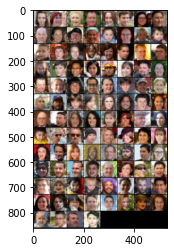

In [ ]:
plt.imshow(vutils.make_grid(torch.from_numpy(inpainted_image).permute(0, 3, 1, 2)).permute(1, 2, 0))

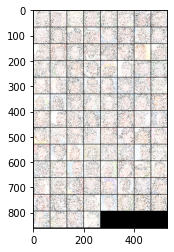

In [ ]:
plt.imshow(vutils.make_grid(corrupted_images).permute(1, 2, 0))

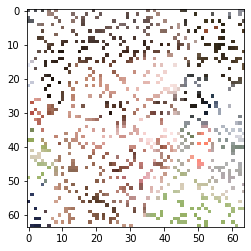

In [ ]:
plt.imshow(corrupted_images[5].permute(1, 2, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


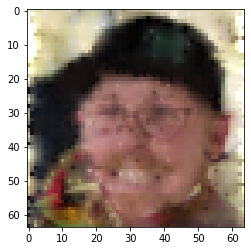

In [ ]:
plt.imshow(inpainted_image[10])

In [ ]:
from torchvision.utils import save_image
save_image(vutils.make_grid(torch.from_numpy(inpainted_image).permute(0, 3, 1, 2)), '/content/100_inpaints_noise.png')

In [ ]:
def __create_2channel_mask(mask):
    if len(mask.shape) == 2:
        return mask

    assert (len(mask.shape) == 3)
    return mask[:, :, 0]

def __binarize_masks(mask):
    bmask = np.empty_like(mask)
    bmask[mask > 0] = 1
    bmask[mask <= 0] = 0

    return bmask

def __apply_mask(image, mask):
    # image_copy = torch.tensor.copy(image)
    # image_copy = np.copy(image)
    image[:, mask == 0] = 1

    return image

In [ ]:
image = transform(Image.open('/content/data/test_data/ffhq/thumbnails128x128/00356.png'))
# image = np.asarray(image)
# mask = mask_transform(Image.open('/content/data/test_data/noise_80p_masks/020.png'))
# mask = Image.open('/content/data/test_data/noise_80p_masks/020.png')
mask = mask_transform(Image.open('/content/data/test_data/rr_masks/020.png'))
mask = np.asarray(mask)
mask = __binarize_masks(mask)
mask = __create_2channel_mask(mask)

In [ ]:
mask.sum()

3168

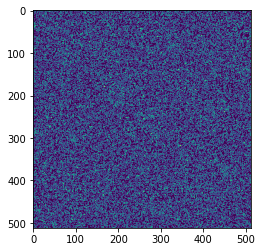

In [ ]:
plt.imshow(mask)

In [ ]:
plt.imshow(__apply_mask(image, mask).permute(1, 2, 0))

IndexError: ignored

#### StyleGAN

In [ ]:
stylegan_checkpoint = '/content/drive/My Drive/Projects/iis-project/checkpoints/stylegan/stylegan-256px-new.model'

In [ ]:
inpainter = InpaintModel(model_filename=stylegan_checkpoint, config=_styleganConfig, gan_type='stylegan')

In [ ]:
transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(256),
        transforms.ToTensor(),
        # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

In [ ]:
mask_generator = lambda image_size=(64, 64): MaskGenerator.centered_rectangle((256, 256))  
inpaint_dataset = InpaintDataset('/content/data/ffhq_HQ/00000', transform=transform, mask_generator=mask_generator)

In [ ]:
dataloader = DataLoader(inpaint_dataset, batch_size=10)

In [ ]:
for target_images, corrupted_images, masks in dataloader:
  importance_weight, G_z, inpainted_image = inpainter.inpaint(corrupted_images=corrupted_images, image_masks=masks)
  break

/content/image-inpainting/src/utils/helpers.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  bmasks = torch.tensor(masks)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


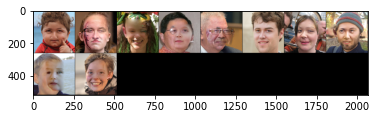

In [ ]:
plt.imshow(vutils.make_grid(torch.from_numpy(inpainted_image).permute(0, 3, 1, 2)).permute(1, 2, 0))

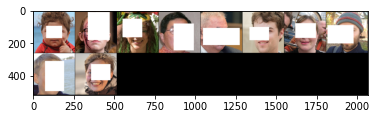

In [ ]:
plt.imshow(vutils.make_grid(corrupted_images).permute(1, 2, 0))

In [ ]:
from torchvision.utils import save_image
save_image(vutils.make_grid(torch.from_numpy(inpainted_image).permute(0, 3, 1, 2)), '/content/stylegan_100_inpaints.png')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


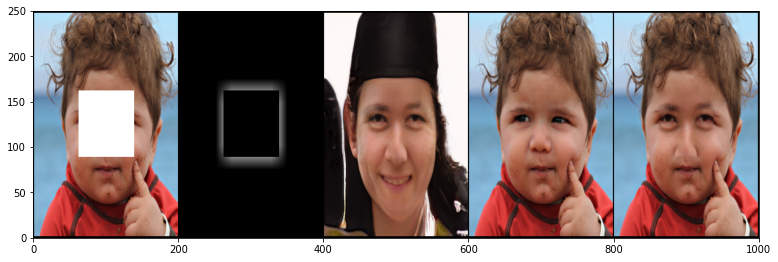

In [ ]:
_idx = 0
show_inpainting(corrupted_images[_idx].permute(1, 2, 0).numpy(), importance_weight[_idx], G_z[_idx], target_images[_idx].permute(1, 2, 0).numpy(), inpainted_image[_idx], nrow=5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


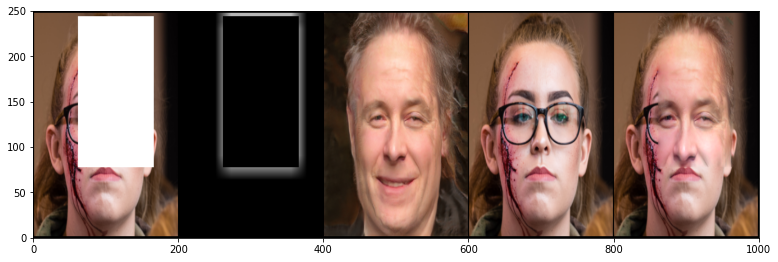

In [ ]:
_idx = 1
show_inpainting(corrupted_images[_idx].permute(1, 2, 0).numpy(), importance_weight[_idx], G_z[_idx], target_images[_idx].permute(1, 2, 0).numpy(), inpainted_image[_idx], nrow=5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


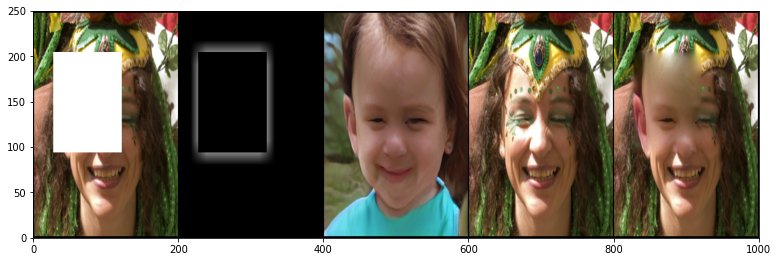

In [ ]:
_idx = 2
show_inpainting(corrupted_images[_idx].permute(1, 2, 0).numpy(), importance_weight[_idx], G_z[_idx], target_images[_idx].permute(1, 2, 0).numpy(), inpainted_image[_idx], nrow=5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


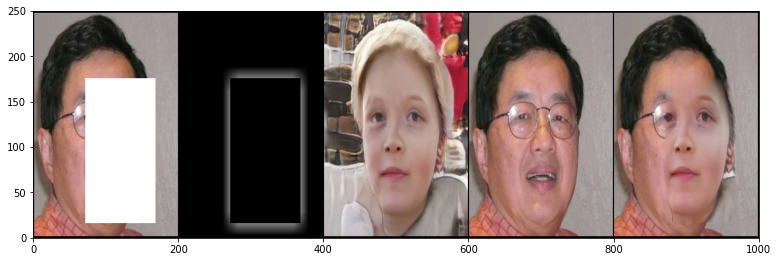

In [ ]:
_idx = 3
show_inpainting(corrupted_images[_idx].permute(1, 2, 0).numpy(), importance_weight[_idx], G_z[_idx], target_images[_idx].permute(1, 2, 0).numpy(), inpainted_image[_idx], nrow=5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


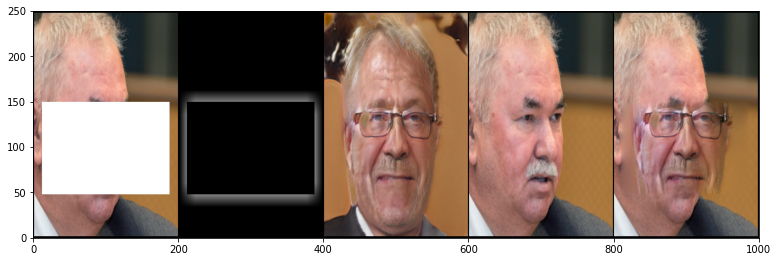

In [ ]:
_idx = 4
show_inpainting(corrupted_images[_idx].permute(1, 2, 0).numpy(), importance_weight[_idx], G_z[_idx], target_images[_idx].permute(1, 2, 0).numpy(), inpainted_image[_idx], nrow=5)

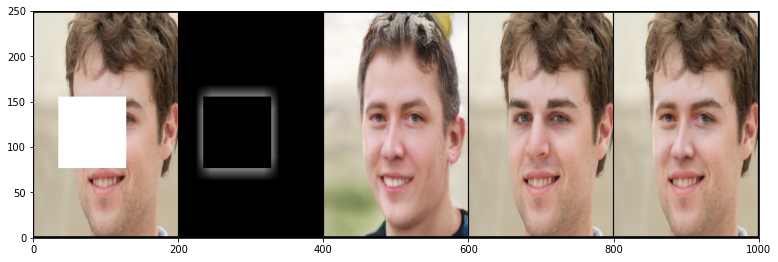

In [ ]:
_idx = 5
show_inpainting(corrupted_images[_idx].permute(1, 2, 0).numpy(), importance_weight[_idx], G_z[_idx], target_images[_idx].permute(1, 2, 0).numpy(), inpainted_image[_idx], nrow=5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


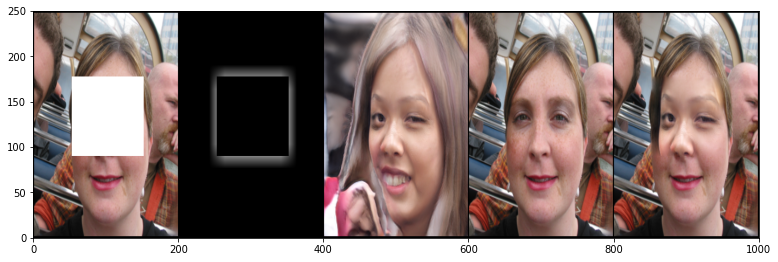

In [ ]:
_idx = 6
show_inpainting(corrupted_images[_idx].permute(1, 2, 0).numpy(), importance_weight[_idx], G_z[_idx], target_images[_idx].permute(1, 2, 0).numpy(), inpainted_image[_idx], nrow=5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


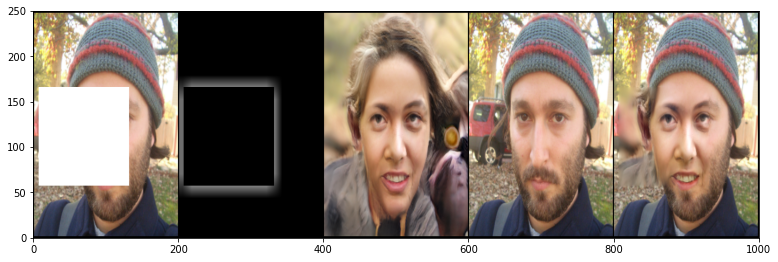

In [ ]:
_idx = 7
show_inpainting(corrupted_images[_idx].permute(1, 2, 0).numpy(), importance_weight[_idx], G_z[_idx], target_images[_idx].permute(1, 2, 0).numpy(), inpainted_image[_idx], nrow=5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


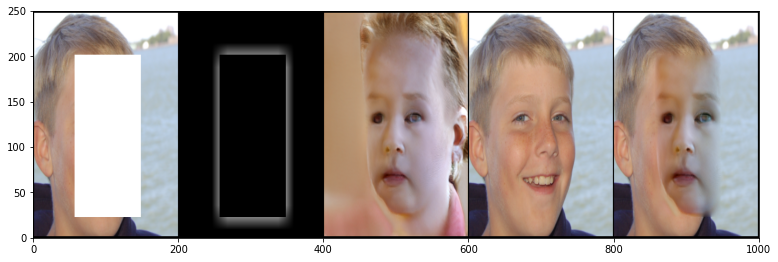

In [ ]:
_idx = 8
show_inpainting(corrupted_images[_idx].permute(1, 2, 0).numpy(), importance_weight[_idx], G_z[_idx], target_images[_idx].permute(1, 2, 0).numpy(), inpainted_image[_idx], nrow=5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


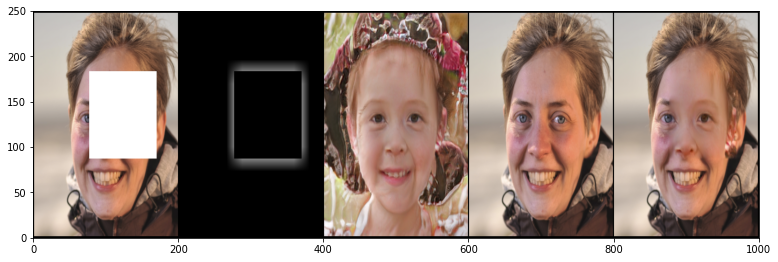

In [ ]:
_idx = 9
show_inpainting(corrupted_images[_idx].permute(1, 2, 0).numpy(), importance_weight[_idx], G_z[_idx], target_images[_idx].permute(1, 2, 0).numpy(), inpainted_image[_idx], nrow=5)

## Evaluation

In [ ]:
dcgan_checkpoint = '"/content/drive/My Drive/Projects/iis-project/checkpoints_ffhq/checkpoint_200.tar"'
stylegan_checkpoint = '"/content/drive/My Drive/Projects/iis-project/checkpoints/stylegan/stylegan-256px-new.model"'
ffhq_test = '/content/data/test_data/ffhq/thumbnails128x128'
ffhq_HQ_test = '/content/data/test_data/ffhq_HQ'
rr_masks = '/content/data/test_data/rr_masks'
noise_80p_masks64x64 = '/content/data/test_data/noise_80p_masks64x64'
noise_80p_masks256x256 = '/content/data/test_data/noise_80p_masks256x256'
qd_masks = '/content/data/test_data/qd_masks'
output_path = '/content/output'
drive_output_path = "/content/drive/My Drive/Projects/iis-project/data/output"
dcgan_rr_output = f'"{drive_output_path}/dcgan_rr_output"'
dcgan_noise_80p_output = f'"{drive_output_path}/dcgan_noise_80p_output"'
dcgan_qd_output = f'"{drive_output_path}/dcgan_qd_output"'
stylegan_rr_output = f'"{drive_output_path}/stylegan_rr_output"'
stylegan_qd_output = f'"{drive_output_path}/stylegan_qd_output"'
stylegan_noise_80p_output = f'"{drive_output_path}/stylegan_noise_80p_output"'
partial_stylegan_noise_80p_output = f'"{drive_output_path}/partial-stylegan_noise_80p_output"'

<hr>

#### Masks

In [ ]:
# Random rectangle masks
%cd /content/image-inpainting
!python -m src.scripts.generate_masks -o /content/data/test_data/rr_masks --type rr --width 512 --height 512 --count 100
%cd /content/image-inpainting/src

/content/image-inpainting
/content/image-inpainting/src


In [ ]:
# Noise masks 64x64
%cd /content/image-inpainting
!python -m src.scripts.generate_masks -o /content/data/test_data/noise_80p_masks64x64 --type noise --percent 0.8 --width 64 --height 64 --count 100
%cd /content/image-inpainting/src

/content/image-inpainting
/content/image-inpainting/src


In [ ]:
# Noise masks 256x256
%cd /content/image-inpainting
!python -m src.scripts.generate_masks -o /content/data/test_data/noise_80p_masks256x256 --type noise --percent 0.8 --width 256 --height 256 --count 100
%cd /content/image-inpainting/src

/content/image-inpainting
/content/image-inpainting/src


In [ ]:
# Quick draw irregular masks
!python /content/image-inpainting/src/scripts/sample_files.py -i /content/data/qd_masks/qd_imd/train -o /content/data/test_data/qd_masks --size 100

#### DCGAN

In [ ]:
# Inpainting images corrupted with random rectangle masks
!python evaluation_generator.py --gt-path $ffhq_test --masks-path $rr_masks --image-size 64 --type dcgan --checkpoint $dcgan_checkpoint --output-path $dcgan_rr_output

[+] DCGAN model loaded! Epoch 200.
/content/image-inpainting/src/utils/helpers.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  bmasks = torch.tensor(masks)


In [ ]:
!zip -r /content/dcgan_rr_output.zip $dcgan_rr_output
# !cp /content/dcgan_rr_output.zip "/content/drive/My Drive/Projects/iis-project/data/output"

In [ ]:
# Inpainting images corrupted with 80% random noise
!python evaluation_generator.py --gt-path $ffhq_test --masks-path $noise_80p_masks64x64 --image-size 64 --type dcgan --checkpoint $dcgan_checkpoint --output-path $dcgan_noise_80p_output

[+] DCGAN model loaded! Epoch 200.
/content/image-inpainting/src/utils/helpers.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  bmasks = torch.tensor(masks)


In [ ]:
!zip -r /content/dcgan_noise_80p_output.zip $dcgan_noise_80p_output

In [ ]:
# Inpainting quick draw mask corrupted images
!python evaluation_generator.py --gt-path $ffhq_test --masks-path $qd_masks --image-size 64 --type dcgan --checkpoint $dcgan_checkpoint --output-path $dcgan_qd_output

[+] DCGAN model loaded! Epoch 200.
/content/image-inpainting/src/utils/helpers.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  bmasks = torch.tensor(masks)


#### StyleGAN

In [ ]:
# Inpainting images corrupted with random rectangle masks
!python evaluation_generator.py --gt-path $ffhq_HQ_test --masks-path $rr_masks --image-size 256 --type stylegan --checkpoint $stylegan_checkpoint --output-path $stylegan_rr_output --batch-size 25

/content/image-inpainting/src/utils/helpers.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  bmasks = torch.tensor(masks)
/content/image-inpainting/src/utils/helpers.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  bmasks = torch.tensor(masks)
/content/image-inpainting/src/utils/helpers.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  bmasks = torch.tensor(masks)
/content/image-inpainting/src/utils/helpers.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTenso

In [ ]:
!zip -r /content/stylegan_rr_output.zip $stylegan_rr_output
!cp /content/stylegan_rr_output.zip 

In [ ]:
# Inpainting quick draw mask corrupted images
!python evaluation_generator.py --gt-path $ffhq_HQ_test --masks-path $qd_masks --image-size 256 --type stylegan --checkpoint $stylegan_checkpoint --output-path $stylegan_qd_output --batch-size 25

/content/image-inpainting/src/utils/helpers.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  bmasks = torch.tensor(masks)
/content/image-inpainting/src/utils/helpers.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  bmasks = torch.tensor(masks)
/content/image-inpainting/src/utils/helpers.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  bmasks = torch.tensor(masks)
/content/image-inpainting/src/utils/helpers.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTenso

In [ ]:
# Inpainting images corrupted with 80% random noise
!python evaluation_generator.py --gt-path $ffhq_HQ_test --masks-path $noise_80p_masks256x256 --image-size 256 --type stylegan --checkpoint $stylegan_checkpoint --output-path $stylegan_noise_80p_output --batch-size 25

/content/image-inpainting/src/utils/helpers.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  bmasks = torch.tensor(masks)
/content/image-inpainting/src/utils/helpers.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  bmasks = torch.tensor(masks)
/content/image-inpainting/src/utils/helpers.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  bmasks = torch.tensor(masks)


#### Metrics

In [ ]:
from pathlib import Path
import pandas as pd

In [ ]:
def extend_drive_path(root_path, extend_str):
    drive_path = Path(root_path.strip('\"')).joinpath(extend_str)
    return f'"{str(drive_path)}"'

In [ ]:
%cd /content/image-inpainting/src/

<hr>

##### DCGAN

In [ ]:
gt_path = extend_drive_path(dcgan_rr_output, 'ground_truth')
pred_path = extend_drive_path(dcgan_rr_output, 'inpainted')
output_path = extend_drive_path(dcgan_rr_output, 'metrics.csv')
!python scripts/metrics.py --gt-path $gt_path --predicted-path $pred_path --output-path $output_path

[gt_path] = /content/drive/My Drive/Projects/iis-project/data/output/dcgan_rr_output/ground_truth
[predicted_path] = /content/drive/My Drive/Projects/iis-project/data/output/dcgan_rr_output/inpainted
[win_size] = 11
[output_path] = /content/drive/My Drive/Projects/iis-project/data/output/dcgan_rr_output/metrics.csv


In [ ]:
dcgan_rr_metrics = pd.read_csv(output_path.strip('\"'))

In [ ]:
dcgan_rr_metrics

name       MAE       PSNR      SSIM
0   00356.png  0.012328  28.823588  0.897615
1   01261.png  0.010833  29.909793  0.903464
2   01491.png  0.037562  18.735531  0.752351
3   01962.png  0.023030  24.156504  0.860273
4   02446.png  0.013368  30.847477  0.945483
..        ...       ...        ...       ...
95  65374.png  0.023870  23.492199  0.872512
96  67985.png  0.018010  24.299553  0.927266
97  68466.png  0.025569  26.593762  0.848137
98  69105.png  0.010203  28.789131  0.904915
99  69979.png  0.006361  32.586430  0.943883

[100 rows x 4 columns]

In [ ]:
dcgan_rr_metrics.mean()

MAE      0.022499
PSNR    25.480519
SSIM     0.875424
dtype: float64

In [ ]:
!python scripts/fid_score.py $gt_path $pred_path

Downloading: "https://github.com/mseitzer/pytorch-fid/releases/download/fid_weights/pt_inception-2015-12-05-6726825d.pth" to /root/.cache/torch/hub/checkpoints/pt_inception-2015-12-05-6726825d.pth
100% 91.2M/91.2M [00:01<00:00, 62.5MB/s]
100% 2/2 [00:30<00:00, 15.23s/it]
100% 2/2 [00:31<00:00, 15.54s/it]
FID:  30.597813991724422


<hr>

In [ ]:
gt_path = extend_drive_path(dcgan_noise_80p_output, 'ground_truth')
pred_path = extend_drive_path(dcgan_noise_80p_output, 'inpainted')
output_path = extend_drive_path(dcgan_noise_80p_output, 'metrics.csv')
!python scripts/metrics.py --gt-path $gt_path --predicted-path $pred_path --output-path $output_path

[gt_path] = /content/drive/My Drive/Projects/iis-project/data/output/dcgan_noise_80p_output/ground_truth
[predicted_path] = /content/drive/My Drive/Projects/iis-project/data/output/dcgan_noise_80p_output/inpainted
[win_size] = 11
[output_path] = /content/drive/My Drive/Projects/iis-project/data/output/dcgan_noise_80p_output/metrics.csv


In [ ]:
dcgan_noise_metrics = pd.read_csv(output_path.strip('\"'))

In [ ]:
dcgan_noise_metrics

name       MAE       PSNR      SSIM
0   00356.png  0.051707  20.376349  0.757085
1   01261.png  0.049906  20.152963  0.740623
2   01491.png  0.046022  20.256197  0.718467
3   01962.png  0.067300  20.122322  0.697437
4   02446.png  0.078598  20.800485  0.754228
..        ...       ...        ...       ...
95  65374.png  0.062587  21.071759  0.685450
96  67985.png  0.071853  19.438311  0.724994
97  68466.png  0.062347  21.247133  0.714437
98  69105.png  0.042926  21.668310  0.741781
99  69979.png  0.047267  20.413560  0.736699

[100 rows x 4 columns]

In [ ]:
dcgan_noise_metrics.mean()

MAE      0.055958
PSNR    20.744801
SSIM     0.729411
dtype: float64

In [ ]:
!python scripts/fid_score.py $gt_path $pred_path

100% 2/2 [00:29<00:00, 14.89s/it]
100% 2/2 [00:30<00:00, 15.01s/it]
FID:  203.98067145333005


<hr>

In [ ]:
gt_path = extend_drive_path(dcgan_qd_output, 'ground_truth')
pred_path = extend_drive_path(dcgan_qd_output, 'inpainted')
output_path = extend_drive_path(dcgan_qd_output, 'metrics.csv')
!python scripts/metrics.py --gt-path $gt_path --predicted-path $pred_path --output-path $output_path

[gt_path] = /content/drive/My Drive/Projects/iis-project/data/output/dcgan_qd_output/ground_truth
[predicted_path] = /content/drive/My Drive/Projects/iis-project/data/output/dcgan_qd_output/inpainted
[win_size] = 11
[output_path] = /content/drive/My Drive/Projects/iis-project/data/output/dcgan_qd_output/metrics.csv


In [ ]:
dcgan_qd_metrics = pd.read_csv(output_path.strip('\"'))

In [ ]:
dcgan_qd_metrics

name       MAE       PSNR      SSIM
0   00356.png  0.003461  35.677407  0.978624
1   01261.png  0.005539  35.310560  0.968749
2   01491.png  0.006705  31.227813  0.950035
3   01962.png  0.016156  24.730097  0.901142
4   02446.png  0.004429  38.134330  0.986635
..        ...       ...        ...       ...
95  65374.png  0.002887  36.180585  0.987873
96  67985.png  0.002427  37.219466  0.993506
97  68466.png  0.002011  41.001130  0.993092
98  69105.png  0.008671  31.491278  0.942490
99  69979.png  0.003153  36.000470  0.976181

[100 rows x 4 columns]

In [ ]:
dcgan_qd_metrics.mean()

MAE      0.006496
PSNR    34.055389
SSIM     0.964138
dtype: float64

In [ ]:
!python scripts/fid_score.py $gt_path $pred_path

100% 2/2 [00:29<00:00, 14.67s/it]
100% 2/2 [00:29<00:00, 14.79s/it]
FID:  25.351344157247865


##### StyleGAN

In [ ]:
gt_path = extend_drive_path(stylegan_rr_output, 'ground_truth')
pred_path = extend_drive_path(stylegan_rr_output, 'inpainted')
output_path = extend_drive_path(stylegan_rr_output, 'metrics.csv')
!python scripts/metrics.py --gt-path $gt_path --predicted-path $pred_path --output-path $output_path

[gt_path] = /content/drive/My Drive/Projects/iis-project/data/output/stylegan_rr_output/ground_truth
[predicted_path] = /content/drive/My Drive/Projects/iis-project/data/output/stylegan_rr_output/inpainted
[win_size] = 11
[output_path] = /content/drive/My Drive/Projects/iis-project/data/output/stylegan_rr_output/metrics.csv


In [ ]:
stylegan_rr_metrics = pd.read_csv(output_path.strip('\"'))

In [ ]:
stylegan_rr_metrics

name       MAE       PSNR      SSIM
0   00356.png  0.013703  27.123243  0.915991
1   01261.png  0.012863  27.967071  0.926993
2   01491.png  0.037887  18.908372  0.827522
3   01962.png  0.019842  24.466546  0.910229
4   02446.png  0.024566  26.477825  0.938803
..        ...       ...        ...       ...
95  65374.png  0.025851  23.773775  0.884551
96  67985.png  0.023093  22.019364  0.900138
97  68466.png  0.027910  24.796538  0.871254
98  69105.png  0.007549  30.429147  0.944238
99  69979.png  0.006024  31.789834  0.953062

[100 rows x 4 columns]

In [ ]:
stylegan_rr_metrics.mean()

MAE      0.023768
PSNR    24.575947
SSIM     0.890645
dtype: float64

In [ ]:
!python scripts/fid_score.py $gt_path $pred_path

100% 2/2 [00:30<00:00, 15.23s/it]
100% 2/2 [00:30<00:00, 15.29s/it]
FID:  35.45474206193353


<hr>

In [ ]:
gt_path = extend_drive_path(partial_stylegan_noise_80p_output, 'ground_truth')
pred_path = extend_drive_path(partial_stylegan_noise_80p_output, 'inpainted')
output_path = extend_drive_path(partial_stylegan_noise_80p_output, 'metrics.csv')
!python scripts/metrics.py --gt-path $gt_path --predicted-path $pred_path --output-path $output_path

[gt_path] = /content/drive/My Drive/Projects/iis-project/data/output/partial-stylegan_noise_80p_output/ground_truth
[predicted_path] = /content/drive/My Drive/Projects/iis-project/data/output/partial-stylegan_noise_80p_output/inpainted
[win_size] = 11
[output_path] = /content/drive/My Drive/Projects/iis-project/data/output/partial-stylegan_noise_80p_output/metrics.csv


In [ ]:
stylegan_noise_metrics = pd.read_csv(output_path.strip('\"'))

In [ ]:
stylegan_noise_metrics

name       MAE       PSNR      SSIM
0   00356.png  0.025099  25.404260  0.812450
1   01261.png  0.028064  24.943123  0.796188
2   01491.png  0.021726  25.805204  0.816666
3   01962.png  0.035290  24.253315  0.801704
4   02446.png  0.047847  25.195481  0.781522
..        ...       ...        ...       ...
70  51367.png  0.048663  23.344820  0.806070
71  51650.png  0.033091  25.004786  0.749324
72  53998.png  0.028228  25.619171  0.810884
73  54588.png  0.012535  26.538284  0.896803
74  54591.png  0.029133  26.139835  0.798438

[75 rows x 4 columns]

In [ ]:
stylegan_noise_metrics.mean()

MAE      0.027863
PSNR    25.653825
SSIM     0.811616
dtype: float64

In [ ]:
!python scripts/fid_score.py $gt_path $pred_path

100% 2/2 [00:23<00:00, 11.68s/it]
100% 2/2 [00:23<00:00, 11.54s/it]
FID:  148.26835602989183


<hr>

In [ ]:
gt_path = extend_drive_path(stylegan_qd_output, 'ground_truth')
pred_path = extend_drive_path(stylegan_qd_output, 'inpainted')
output_path = extend_drive_path(stylegan_qd_output, 'metrics.csv')
!python scripts/metrics.py --gt-path $gt_path --predicted-path $pred_path --output-path $output_path

[gt_path] = /content/drive/My Drive/Projects/iis-project/data/output/stylegan_qd_output/ground_truth
[predicted_path] = /content/drive/My Drive/Projects/iis-project/data/output/stylegan_qd_output/inpainted
[win_size] = 11
[output_path] = /content/drive/My Drive/Projects/iis-project/data/output/stylegan_qd_output/metrics.csv


In [ ]:
stylegan_qd_metrics = pd.read_csv(output_path.strip('\"'))

In [ ]:
stylegan_qd_metrics

name       MAE       PSNR      SSIM
0   00356.png  0.002033  38.566084  0.979246
1   01261.png  0.004389  34.533200  0.959493
2   01491.png  0.005343  32.819121  0.946557
3   01962.png  0.004547  32.204787  0.973467
4   02446.png  0.003397  38.170969  0.984757
..        ...       ...        ...       ...
95  65374.png  0.018047  25.146252  0.893137
96  67985.png  0.002848  33.958741  0.986062
97  68466.png  0.018546  28.148228  0.867982
98  69105.png  0.005435  32.899492  0.953077
99  69979.png  0.004271  33.004170  0.967274

[100 rows x 4 columns]

In [ ]:
stylegan_qd_metrics.mean()

MAE      0.007876
PSNR    32.325508
SSIM     0.945807
dtype: float64

In [ ]:
!python scripts/fid_score.py $gt_path $pred_path

100% 2/2 [00:29<00:00, 14.87s/it]
100% 2/2 [00:30<00:00, 15.17s/it]
FID:  32.308626363537655


<hr>